In [5]:
# install.packages('Hmisc')

also installing the dependencies ‘checkmate’, ‘viridisLite’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
library(forecast)
library(tseries)
library(lmtest)
library(Hmisc)

options(repr.plot.width = 8, repr.plot.height = 4)

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



In [19]:
data = read.csv('data3.csv',sep = '')

In [15]:
data

TICKER,DATE,OPEN,HIGH,LOW,CLOSE,WAPRICE
USD_RUR,2016-10-30,62.97500,62.99030,62.97500,62.99030,62.982
USD_RUR,2016-10-31,62.99030,63.45800,62.90110,63.32000,63.279
USD_RUR,2016-11-01,63.32690,63.42150,62.90000,63.31630,63.203
USD_RUR,2016-11-02,63.28410,63.84595,63.06500,63.49855,63.512
USD_RUR,2016-11-03,63.51900,63.83740,63.30215,63.59500,63.639
USD_RUR,2016-11-04,63.58310,64.63950,63.55000,64.45680,64.041
USD_RUR,2016-11-06,64.20630,64.20630,64.20630,64.20630,64.206
USD_RUR,2016-11-07,64.26430,64.67000,63.55500,63.73220,63.804
USD_RUR,2016-11-08,63.73430,64.01980,63.46500,63.80715,63.742
USD_RUR,2016-11-09,63.79190,64.80250,63.22000,63.86160,63.842


целевая переменная waprice

In [17]:
# data$WARPICE <- as.numeric(data$WARPRICE)
# data$DATE <- as.Date(as.yearmon(data$DATE, format="%Y-%m-%d"))

выходные пропущены, но будем считать, что все дни идут подряд

In [44]:
tSeries <- ts(data = data$WAPRICE, 
              start = 1:length(data$WAPRICE),
              freq = 5)

In [45]:
tSeries

Time Series:
Start = c(1, 2) 
End = c(32, 4) 
Frequency = 5 
  [1] 62.982 63.279 63.203 63.512 63.639 64.041 64.206 63.804 63.742 63.842
 [11] 64.258 65.698 65.904 66.193 65.074 64.825 64.621 64.854 64.722 64.122
 [21] 63.817 64.370 64.443 64.678 64.495 64.891 65.148 64.535 63.876 64.038
 [31] 63.711 63.835 63.698 63.350 62.898 62.467 61.156 60.868 61.151 61.748
 [41] 61.841 61.843 61.596 61.103 60.911 61.075 60.906 60.754 60.472 60.416
 [51] 61.098 61.312 60.812 60.680 59.785 59.453 59.653 59.871 60.041 60.121
 [61] 59.360 59.503 59.702 59.343 59.300 59.715 59.772 59.747 59.480 59.271
 [71] 59.289 60.082 60.027 59.848 59.856 59.984 60.067 60.213 59.644 59.222
 [81] 59.020 59.009 58.857 59.280 59.344 58.932 58.629 58.059 57.507 57.284
 [91] 57.329 58.043 58.071 57.771 57.775 57.855 58.104 58.533 57.900 58.157
[101] 58.298 58.611 58.632 58.170 58.138 58.438 59.140 59.058 59.002 59.170
[111] 58.986 58.028 57.685 57.409 57.338 57.871 57.560 57.195 56.942 56.981
[121] 56.859 56.281 56.229 

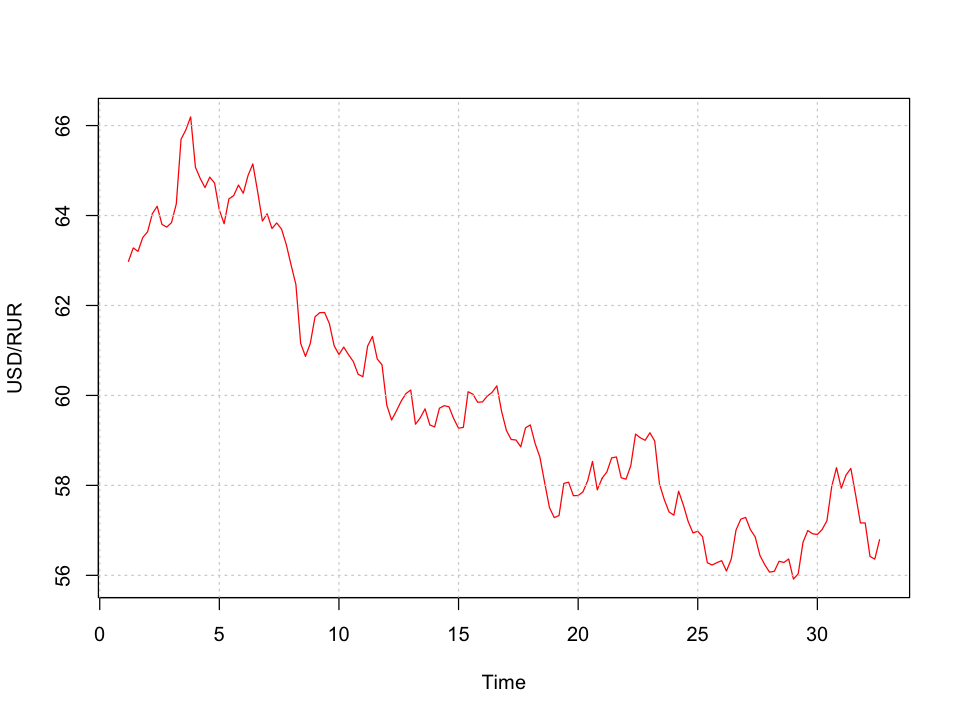

In [46]:
xname <- "USD/RUR"
plot(tSeries, type="l", ylab=xname, col="red")
grid()

In [120]:
trainSeries <- window(tSeries, end=c(26)) 
testSeries  <- window(tSeries, start=c(26))

In [121]:
length(trainSeries)

[1] 125

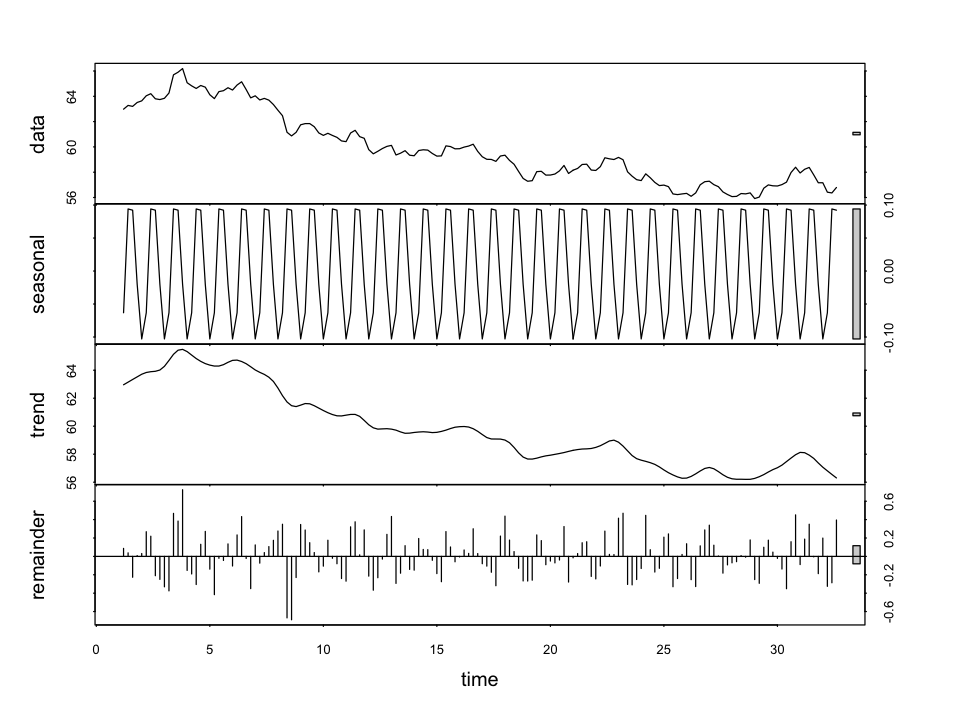

In [122]:
options(repr.plot.width = 8, repr.plot.height = 6)

stl.decompose = stl(tSeries, s.window="periodic")
plot(stl.decompose)

после удаления недельного (5 дней) периода тренд выглядит достаточно гладким

In [123]:
stl.decompose

 Call:
 stl(x = tSeries, s.window = "periodic")

Components
Time Series:
Start = c(1, 2) 
End = c(32, 4) 
Frequency = 5 
        seasonal    trend    remainder
 1.2 -0.06322193 62.95849  0.086735812
 1.4  0.09406605 63.14685  0.038080701
 1.6  0.09222685 63.33740 -0.226631358
 1.8 -0.02012339 63.52366  0.008465255
 2.0 -0.10294753 63.71108  0.030863167
 2.2 -0.06322193 63.83611  0.268112559
 2.4  0.09406605 63.89278  0.219153815
 2.6  0.09222685 63.92162 -0.209847084
 2.8 -0.02012339 64.01185 -0.249729413
 3.0 -0.10294753 64.27570 -0.330748877
 3.2 -0.06322193 64.69593 -0.374711106
 3.4  0.09406605 65.13632  0.467618134
 3.6  0.09222685 65.42800  0.383777984
 3.8 -0.02012339 65.48842  0.724699344
 4.0 -0.10294753 65.32910 -0.152150529
 4.2 -0.06322193 65.07896 -0.190737844
 4.4  0.09406605 64.83244 -0.305502663
 4.6  0.09222685 64.63062  0.131156961
 4.8 -0.02012339 64.47066  0.271467998
 5.0 -0.10294753 64.36326 -0.138313467
 5.2 -0.06322193 64.29612 -0.415901021
 5.4  0.09406605 64.2

применим преобразование Бокса-Кокса

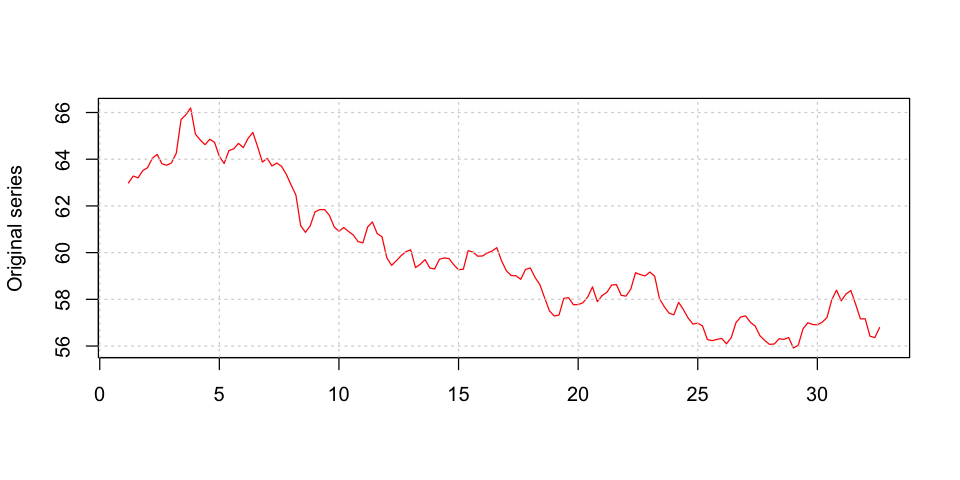

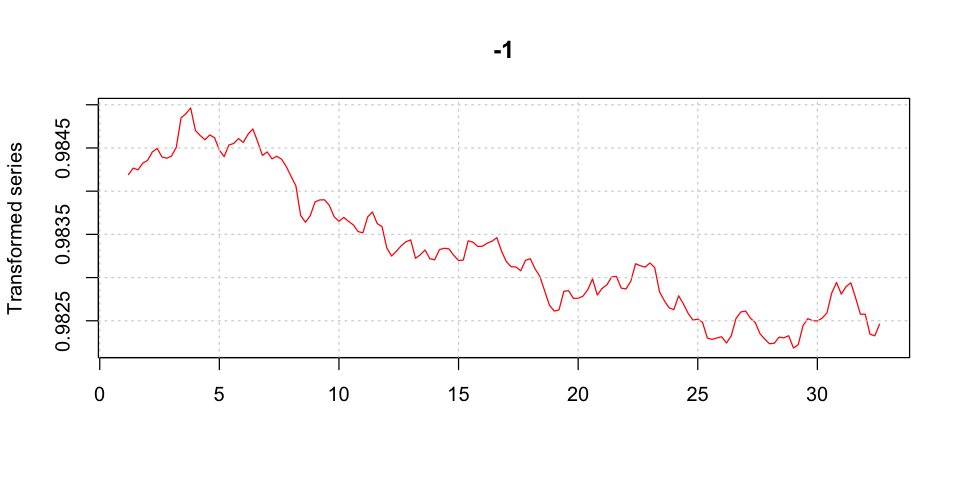

In [124]:
options(repr.plot.width = 8, repr.plot.height = 4)


plot(tSeries, ylab="Original series", xlab="", col="red")
grid()

LambdaOpt <- BoxCox.lambda(tSeries)
plot(BoxCox(tSeries, LambdaOpt), ylab="Transformed series", xlab="", col="red")
title(main=toString(round(LambdaOpt, 3)))
grid()

Ряд не выглядит существенно более стационарным, так что откажемся от преобразования Бокса-Кокса.

Прогноз ETS + STL

In [125]:
fitETS <- ets(tSeries)
print(fitETS)

ETS(M,N,N) 

Call:
 ets(y = tSeries) 

  Smoothing parameters:
    alpha = 0.9999 

  Initial states:
    l = 63.053 

  sigma:  0.0064

     AIC     AICc      BIC 
502.8201 502.9759 512.0078 


Настроив выбранную модель на обучающей выборке, посчитаем её качество на тестовой

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.05737573,0.3840023,0.2820515,-0.09770712,0.4637727,0.3875576,0.2259323,NA
Test set,0.48356283,0.8482667,0.6394241,0.83505661,1.1126892,0.8786114,0.8482277,2.312985


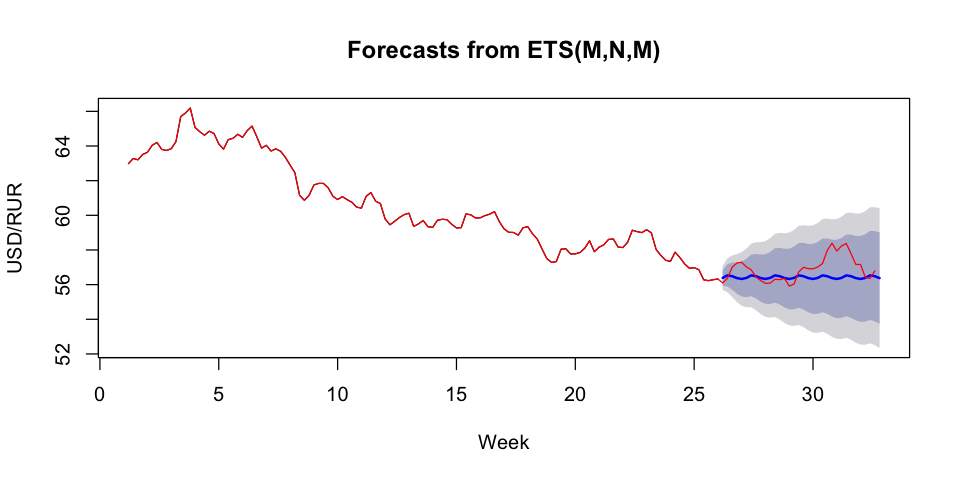

In [126]:
D = 159 - 125
fitShort <- ets(trainSeries, model="MNM", damped=F)
fc <- forecast(fitShort, h=D)
accuracy(fc, testSeries)

plot(forecast(fitShort, h=D), ylab=xname, xlab="Week")
lines(tSeries, col="red")

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-0.0525905,0.3807343,0.2773059,-0.0900906,0.4561852,0.3810368,0.2349896,NA
Test set,0.4713419,0.8424456,0.6366584,0.8135652,1.1080095,0.8748111,0.8466969,2.296502


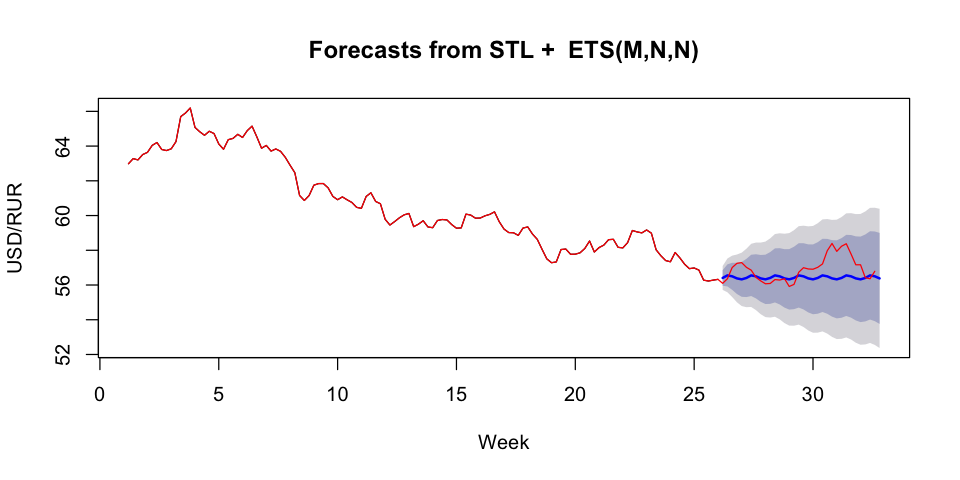

In [127]:
stl.decompose <-  stl(trainSeries, s.window="periodic")
fc <- forecast(stl.decompose, h=D)
accuracy(fc, testSeries)

plot(forecast(stl.decompose, h=D), ylab=xname, xlab="Week")
lines(tSeries, col="red")

In [128]:
stl.decompose

 Call:
 stl(x = trainSeries, s.window = "periodic")

Components
Time Series:
Start = c(1, 2) 
End = c(26, 1) 
Frequency = 5 
        seasonal    trend    remainder
 1.2 -0.02669145 62.94209  0.066603755
 1.4  0.12027425 63.13633  0.022399107
 1.6  0.06650252 63.33098 -0.194482628
 1.8 -0.05248055 63.52076  0.043722172
 2.0 -0.10760480 63.71114  0.035464568
 2.2 -0.02669145 63.83461  0.233082622
 2.4  0.12027425 63.89179  0.193931055
 2.6  0.06650252 63.92250 -0.185002729
 2.8 -0.05248055 64.01340 -0.218922407
 3.0 -0.10760480 64.27575 -0.326147470
 3.2 -0.02669145 64.69443 -0.409741033
 3.4  0.12027425 65.13533  0.442395376
 3.6  0.06650252 65.42888  0.408622330
 3.8 -0.05248055 65.48997  0.755506343
 4.0 -0.10760480 65.32915 -0.147549119
 4.2 -0.02669145 65.07746 -0.225767761
 4.4  0.12027425 64.83145 -0.330725419
 4.6  0.06650252 64.63150  0.156001298
 4.8 -0.05248055 64.47221  0.302274989
 5.0 -0.10760480 64.36332 -0.133712053
 5.2 -0.02669145 64.29462 -0.450930928
 5.4  0.12027425 

как видно, предсказания ets и ets+stl не сильно отличаются, а ошибка достаточно маленькая по всем метрикам.

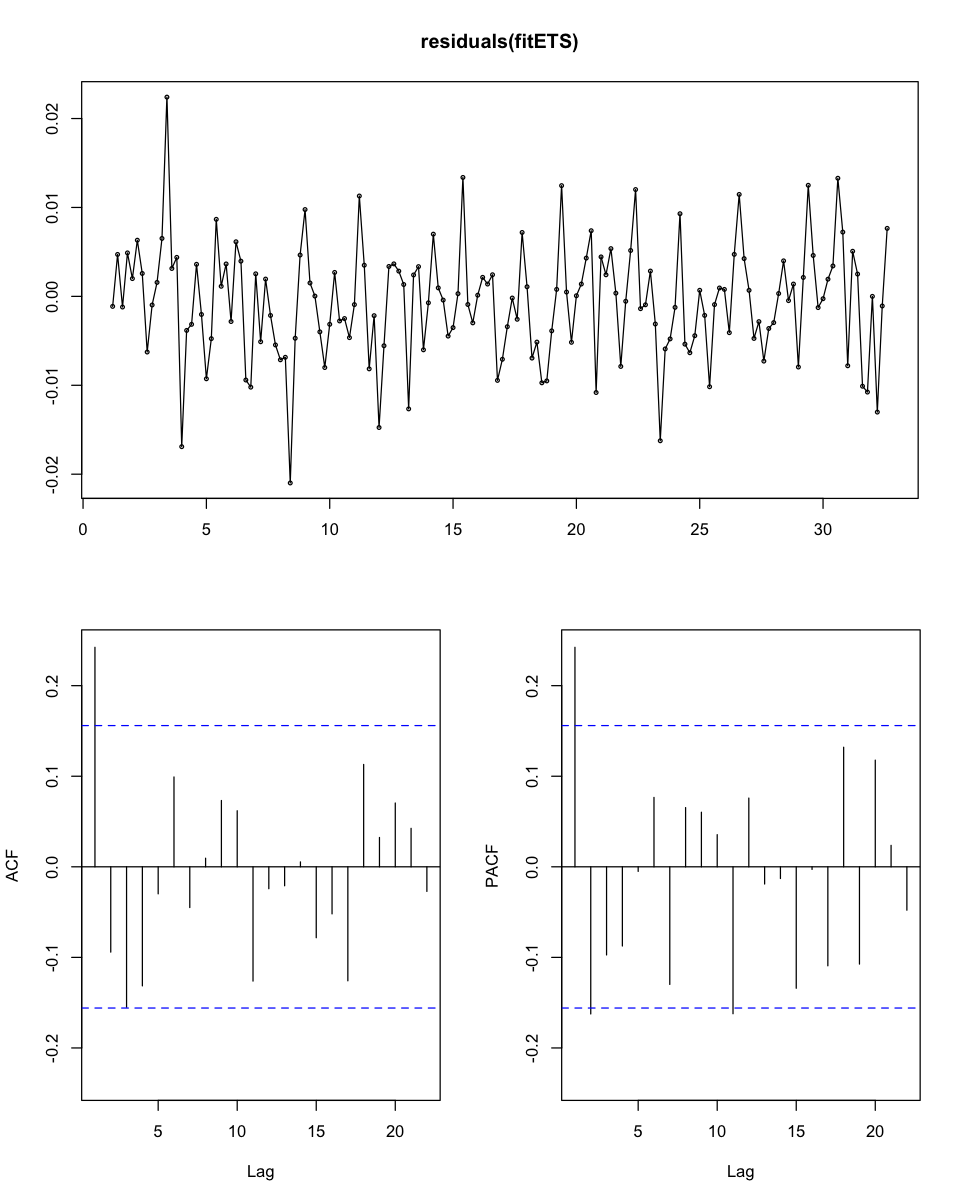

In [94]:
options(repr.plot.width = 8, repr.plot.height = 10)

tsdisplay(residuals(fitETS))

Достигаемые уровни значимости критерия Льюнга-Бокса для них:

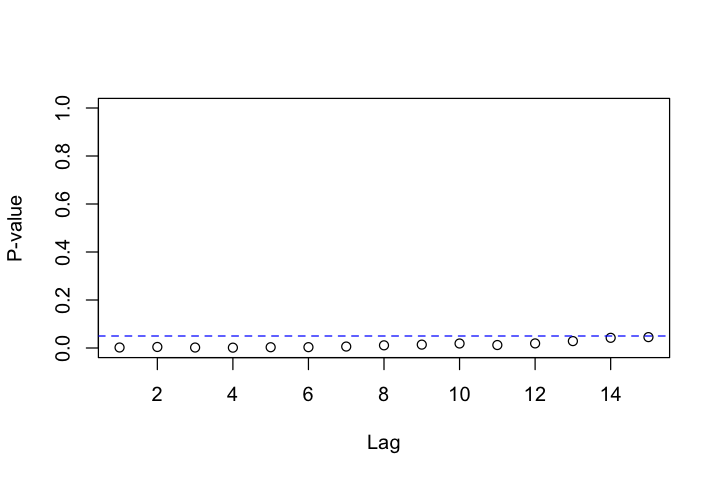

In [76]:
options(repr.plot.width = 6, repr.plot.height = 4)

p <- rep(0, 1, frequency(tSeries)*3)
for (i in 1:length(p)){
  p[i] <- Box.test(residuals(fitETS), lag=i, type = "Ljung-Box")$p.value
}

plot(p, xlab="Lag", ylab="P-value", ylim=c(0,1))
abline(h = 0.05, lty = 2, col = "blue")

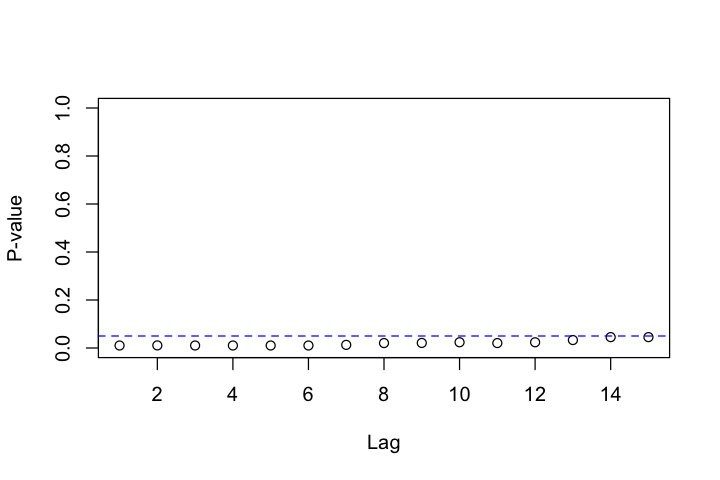

In [77]:
corrected_pvals <- p.adjust(p, method = 'BH')
plot(corrected_pvals, xlab="Lag", ylab="P-value", ylim=c(0,1))
abline(h = 0.05, lty = 2, col = "blue")


Q-Q plot и гистограмма для остатков:

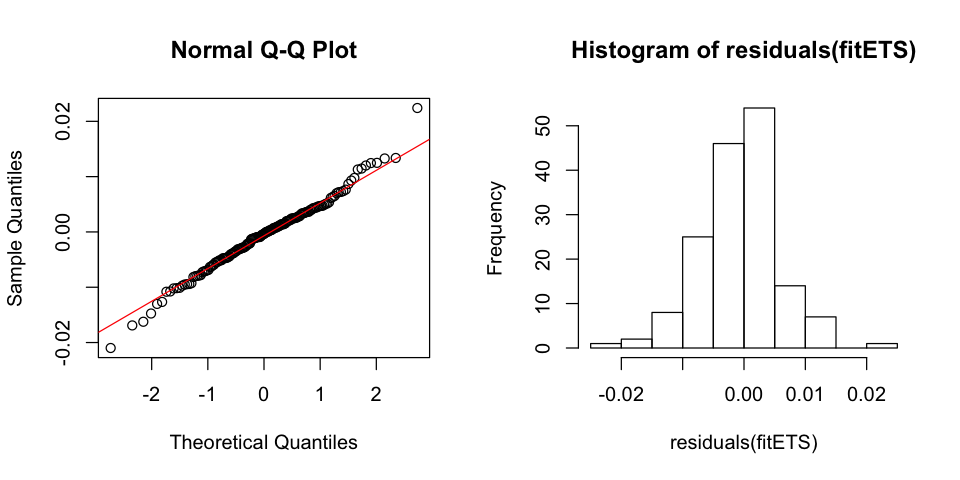

In [78]:
options(repr.plot.width = 8, repr.plot.height = 4)

par(mfrow=c(1,2))
qqnorm(residuals(fitETS))
qqline(residuals(fitETS), col="red")
hist(residuals(fitETS))



* Нормальность --- критерий Шапиро-Уилка
* Несмещённость --- критерий Уилкоксона
* Стационарность --- критерий KPSS
* Гомоскедастичность --- критерий Бройша-Пагана 



In [79]:
shapiro.test(residuals(fitETS))$p.value
wilcox.test(residuals(fitETS))$p.value
kpss.test(residuals(fitETS))$p.value
bptest(residuals(fitETS) ~ c(1:length(residuals(fitETS))))$p.value

[1] 0.2029573

[1] 0.2151598

Warning message in kpss.test(residuals(fitETS)):
“p-value greater than printed p-value”

[1] 0.1

BP 
0.5582876

Ничего не отвеглось

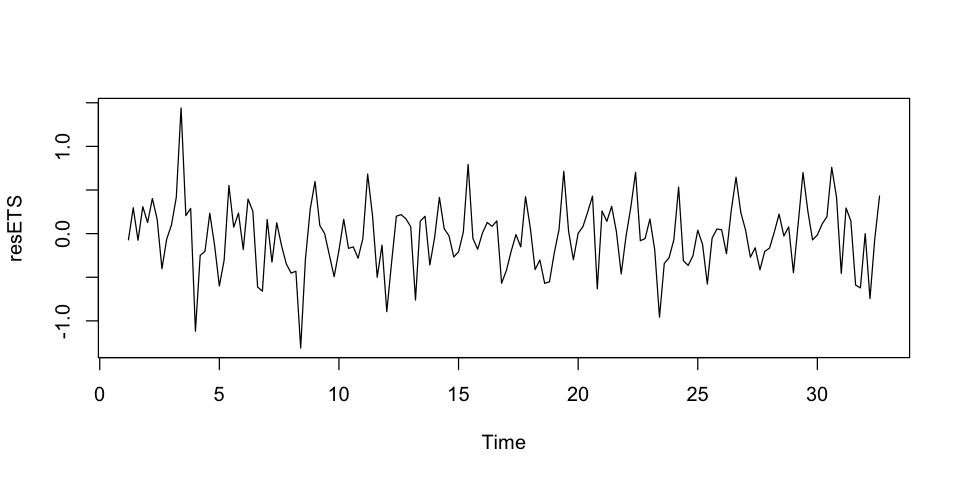

In [81]:
resETS  <- tSeries - fitETS$fitted
plot(resETS)